In [1]:
import random

import numpy as np
import pandas as pd
import sklearn
from sklearn import cluster                   # Algoritmos de clustering.
from sklearn import datasets                  # Crear datasets.
from sklearn import manifold                  # Algoritmos de reduccion de dimensionalidad.
from sklearn import decomposition             # Módulo de reducción de dimensionalidad.
from sklearn.utils import check_random_state  # Gestión de números aleatorios.

# Clustering jerárquico y dendrograma.
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.neighbors import NearestNeighbors

# UMAP para reducción de dimensionalidad.
import umap

# Visualizacion.
import matplotlib
import matplotlib.pyplot as plt
from sklearn.cluster import AffinityPropagation
import sys 
import os
sys.path.append(os.path.abspath('/home/fran/Escritorio/i3uex/education_drop_clustering/Code/analysis_and_modeling'))
import dunn_index
from sklearn import metrics

%matplotlib inline

In [2]:
analys_personal_data = pd.read_csv('../../../Data/For_analysis_and_modeling/2nd_quadrimester/analys_personal_data.csv',sep='|')

In [3]:
analys_personal_data.head()

,expediente,cod_plan,des_plan,anio_apertura_expediente,abandona,convocatoria_acceso,des_acceso,nota_admision_def,sexo,edad_acceso,distance,becario,cum_pass_ratio,cum_absent_ratio,std_deviation,cum_median,cum_pass_median,cum_fail_median
0,2,1623,GRADO EN INGENIERÍA CIVIL - CONSTRUCCIONES CIV...,2009-10,0,JUN,Selectividad,6.836,D,25,300.6305,S,0.235294,0.176471,1.990064,4.175,5.7,3.84
1,3,1623,GRADO EN INGENIERÍA CIVIL - CONSTRUCCIONES CIV...,2009-10,1,JUN,Formación Profesional,6.836,H,31,667.4115,S,0.312500,0.562500,1.566486,5.000,5.0,2.50
2,4,1623,GRADO EN INGENIERÍA CIVIL - CONSTRUCCIONES CIV...,2009-10,0,JUN,Formación Profesional,6.836,D,28,91.0020,N,0.166667,0.444444,1.345324,3.825,5.2,2.53
3,5,1623,GRADO EN INGENIERÍA CIVIL - CONSTRUCCIONES CIV...,2009-10,1,JUN,Selectividad,6.730,D,25,91.0020,N,0.263158,0.315789,1.850120,3.670,5.4,2.50
4,6,1623,GRADO EN INGENIERÍA CIVIL - CONSTRUCCIONES CIV...,2009-10,0,JUN,Selectividad,6.836,H,25,91.0020,N,1.000000,0.000000,1.339003,7.000,7.0,0.00


In [4]:
def le_dataset(dset, le_cols, cat_cols):
    from sklearn import preprocessing
    for col in cat_cols:
        le = preprocessing.LabelEncoder()
        le.fit(dset[col].cat.categories)
        le_cols.append(le)
        dset[col] = le.transform(dset[col])

In [5]:
def inverse_le_dataset(dset, le_cols, cat_cols):
    from sklearn import preprocessing
    i = 0
    for col in cat_cols:
        le = le_cols[i]
        from sklearn import preprocessing
        dset[col] = le.inverse_transform(dset[col])
        i +=1

In [6]:
def get_dunn_index(data, labels):
    from sklearn.metrics.pairwise import euclidean_distances
    distances = euclidean_distances(data)
    return dunn_index.dunn(labels,distances)
    

In [7]:
analys_personal_data_model = analys_personal_data.drop(['expediente','cod_plan','abandona'],axis=1)

In [8]:
analys_personal_data_model.head()

,des_plan,anio_apertura_expediente,convocatoria_acceso,des_acceso,nota_admision_def,sexo,edad_acceso,distance,becario,cum_pass_ratio,cum_absent_ratio,std_deviation,cum_median,cum_pass_median,cum_fail_median
0,GRADO EN INGENIERÍA CIVIL - CONSTRUCCIONES CIV...,2009-10,JUN,Selectividad,6.836,D,25,300.6305,S,0.235294,0.176471,1.990064,4.175,5.7,3.84
1,GRADO EN INGENIERÍA CIVIL - CONSTRUCCIONES CIV...,2009-10,JUN,Formación Profesional,6.836,H,31,667.4115,S,0.312500,0.562500,1.566486,5.000,5.0,2.50
2,GRADO EN INGENIERÍA CIVIL - CONSTRUCCIONES CIV...,2009-10,JUN,Formación Profesional,6.836,D,28,91.0020,N,0.166667,0.444444,1.345324,3.825,5.2,2.53
3,GRADO EN INGENIERÍA CIVIL - CONSTRUCCIONES CIV...,2009-10,JUN,Selectividad,6.730,D,25,91.0020,N,0.263158,0.315789,1.850120,3.670,5.4,2.50
4,GRADO EN INGENIERÍA CIVIL - CONSTRUCCIONES CIV...,2009-10,JUN,Selectividad,6.836,H,25,91.0020,N,1.000000,0.000000,1.339003,7.000,7.0,0.00


In [9]:
analys_personal_data_model = pd.get_dummies(analys_personal_data_model)

In [10]:
analys_personal_data_model.head()

,nota_admision_def,edad_acceso,distance,cum_pass_ratio,cum_absent_ratio,std_deviation,cum_median,cum_pass_median,cum_fail_median,des_plan_GRADO EN EDIFICACIÓN,...,convocatoria_acceso_SEP,des_acceso_Formación Profesional,des_acceso_Mayores de 25/40/45 años,des_acceso_Selectividad,des_acceso_Traslado de Expediente (Estudios Españoles),des_acceso_Título Universitario,sexo_D,sexo_H,becario_N,becario_S
0,6.836,25,300.6305,0.235294,0.176471,1.990064,4.175,5.7,3.84,0,...,0,0,0,1,0,0,1,0,0,1
1,6.836,31,667.4115,0.312500,0.562500,1.566486,5.000,5.0,2.50,0,...,0,1,0,0,0,0,0,1,0,1
2,6.836,28,91.0020,0.166667,0.444444,1.345324,3.825,5.2,2.53,0,...,0,1,0,0,0,0,1,0,1,0
3,6.730,25,91.0020,0.263158,0.315789,1.850120,3.670,5.4,2.50,0,...,0,0,0,1,0,0,1,0,1,0
4,6.836,25,91.0020,1.000000,0.000000,1.339003,7.000,7.0,0.00,0,...,0,0,0,1,0,0,0,1,1,0


In [11]:
from sklearn.preprocessing import MinMaxScaler

norm = MinMaxScaler().fit(analys_personal_data_model)
analys_personal_data_model[analys_personal_data_model.columns] = norm.transform(analys_personal_data_model)

In [12]:
analys_personal_data_model

,nota_admision_def,edad_acceso,distance,cum_pass_ratio,cum_absent_ratio,std_deviation,cum_median,cum_pass_median,cum_fail_median,des_plan_GRADO EN EDIFICACIÓN,...,convocatoria_acceso_SEP,des_acceso_Formación Profesional,des_acceso_Mayores de 25/40/45 años,des_acceso_Selectividad,des_acceso_Traslado de Expediente (Estudios Españoles),des_acceso_Título Universitario,sexo_D,sexo_H,becario_N,becario_S
0,0.217464,0.170732,0.154108,0.235294,0.176471,0.615087,0.4175,0.570,0.783673,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.217464,0.317073,0.349070,0.312500,0.562500,0.484168,0.5000,0.500,0.510204,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.217464,0.243902,0.042680,0.166667,0.444444,0.415811,0.3825,0.520,0.516327,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.204785,0.170732,0.042680,0.263158,0.315789,0.571833,0.3670,0.540,0.510204,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.217464,0.170732,0.042680,1.000000,0.000000,0.413858,0.7000,0.700,0.000000,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1768,0.222967,0.024390,0.072421,0.066667,0.533333,0.370527,0.2200,0.550,0.428571,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1769,0.222847,0.000000,0.070790,0.294118,0.352941,0.638489,0.4300,0.550,0.612245,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1770,0.207656,0.000000,0.020802,0.105263,0.000000,0.455520,0.2000,0.505,0.367347,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1771,0.269856,0.000000,0.036093,0.000000,0.550000,0.215125,0.2500,0.000,0.510204,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [13]:
from sklearn import cluster
K = range(1, 10)
sse = []
for k in K:
    kmeans = cluster.KMeans(n_clusters=k)
    kmeans.fit(analys_personal_data_model)
    sse.append(kmeans.inertia_)


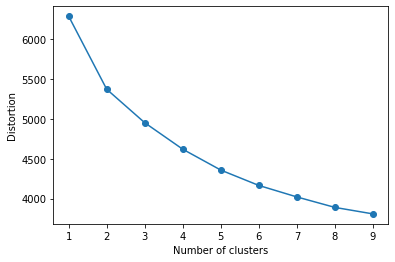

In [14]:
import matplotlib.pyplot as plt
plt.plot(K, sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [15]:
kmeans = cluster.KMeans(n_clusters=2)
kmeans.fit(analys_personal_data_model)
analys_personal_data_clust = analys_personal_data_model.copy()
analys_personal_data_clust['labels'] = kmeans.predict(analys_personal_data_model)
analys_personal_data['labels'] = analys_personal_data_clust['labels'].astype('category')

In [16]:
analys_personal_data_model

,nota_admision_def,edad_acceso,distance,cum_pass_ratio,cum_absent_ratio,std_deviation,cum_median,cum_pass_median,cum_fail_median,des_plan_GRADO EN EDIFICACIÓN,...,convocatoria_acceso_SEP,des_acceso_Formación Profesional,des_acceso_Mayores de 25/40/45 años,des_acceso_Selectividad,des_acceso_Traslado de Expediente (Estudios Españoles),des_acceso_Título Universitario,sexo_D,sexo_H,becario_N,becario_S
0,0.217464,0.170732,0.154108,0.235294,0.176471,0.615087,0.4175,0.570,0.783673,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.217464,0.317073,0.349070,0.312500,0.562500,0.484168,0.5000,0.500,0.510204,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.217464,0.243902,0.042680,0.166667,0.444444,0.415811,0.3825,0.520,0.516327,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.204785,0.170732,0.042680,0.263158,0.315789,0.571833,0.3670,0.540,0.510204,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.217464,0.170732,0.042680,1.000000,0.000000,0.413858,0.7000,0.700,0.000000,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1768,0.222967,0.024390,0.072421,0.066667,0.533333,0.370527,0.2200,0.550,0.428571,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1769,0.222847,0.000000,0.070790,0.294118,0.352941,0.638489,0.4300,0.550,0.612245,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1770,0.207656,0.000000,0.020802,0.105263,0.000000,0.455520,0.2000,0.505,0.367347,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1771,0.269856,0.000000,0.036093,0.000000,0.550000,0.215125,0.2500,0.000,0.510204,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [17]:
metrics.silhouette_score(analys_personal_data_clust, analys_personal_data_clust['labels'])


0.1937200420500537

In [18]:
metrics.calinski_harabasz_score(analys_personal_data_clust, analys_personal_data_clust['labels'])


448.2792453448554

In [19]:
metrics.davies_bouldin_score(analys_personal_data_clust, analys_personal_data_clust['labels'])


1.9681562753743862

In [20]:
get_dunn_index(analys_personal_data_clust,analys_personal_data_clust['labels'])

0.47081033423537283

In [21]:
import pandas as pd
def get_impurity(dropout_cl0: pd.core.series.Series, dropout_cl1:pd.core.series.Series):
    impurity = -1
    n = len (dropout_cl0) + len (dropout_cl1)
    if len(dropout_cl0[dropout_cl0 == 0]) > len(dropout_cl0[dropout_cl0 == 1]):
        impurity = (len(dropout_cl0) - len(dropout_cl0[dropout_cl0 == 0]))/n
    else:
        impurity = (len(dropout_cl0) - len(dropout_cl0[dropout_cl0 == 1]))/n
    if len(dropout_cl1[dropout_cl1 == 0]) > len(dropout_cl1[dropout_cl1 == 1]):
        impurity = impurity + ((len(dropout_cl1) - len(dropout_cl1[dropout_cl1 == 0]))/n)
    else:
        impurity = impurity + ((len(dropout_cl1) - len(dropout_cl1[dropout_cl1 == 1]))/n)
        
    return impurity

In [22]:
analys_personal_data_clust['abandona'] = analys_personal_data['abandona']

In [23]:
get_impurity(analys_personal_data_clust[analys_personal_data_clust['labels']==0]['abandona'], analys_personal_data_clust[analys_personal_data_clust['labels']==1]['abandona'])

0.45741680767061477

In [24]:
analys_personal_data_clust[analys_personal_data_clust['labels']==0]['abandona'].value_counts(normalize=True)

1    0.567599
0    0.432401
Name: abandona, dtype: float64

In [25]:
analys_personal_data_clust[analys_personal_data_clust['labels']==1]['abandona'].value_counts(normalize=True)

0    0.519126
1    0.480874
Name: abandona, dtype: float64

In [23]:
# from apitep_utils.report import Report
# for label in analys_personal_data['labels'].cat.categories:
#     dset = analys_personal_data[analys_personal_data['labels'] == label]
#     report = Report()
#     report.generate_advanced(dset,'KMeans_1st_year_2_cl_'+str(label),sys.path[0]+ '/'+ '1st_year_norm_'+ str(label))